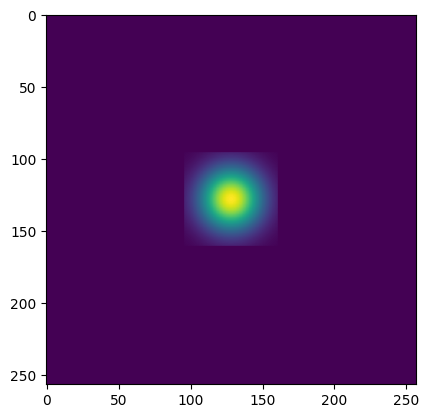

6 times nearest
torch.Size([1, 1, 128, 128])


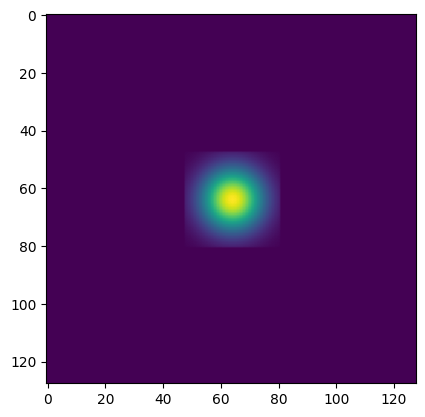

torch.Size([1, 1, 64, 64])


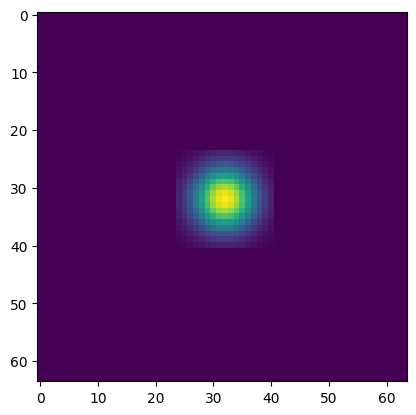

torch.Size([1, 1, 32, 32])


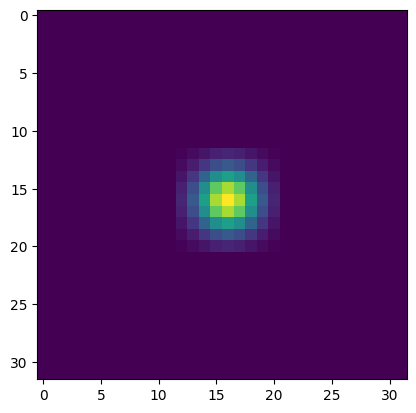

torch.Size([1, 1, 16, 16])


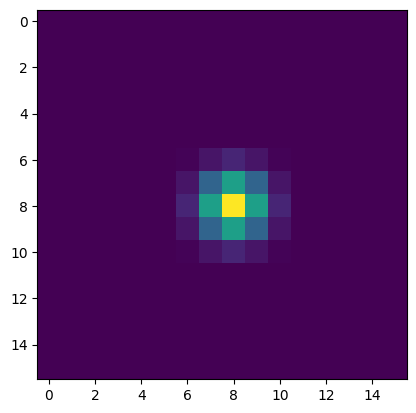

torch.Size([1, 1, 8, 8])


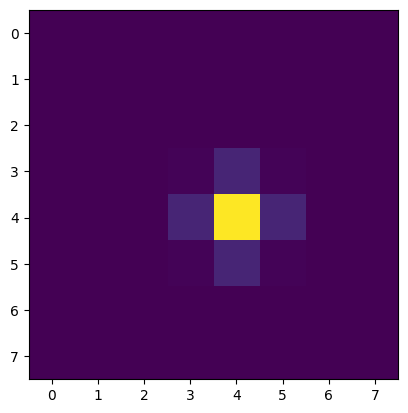

torch.Size([1, 1, 4, 4])


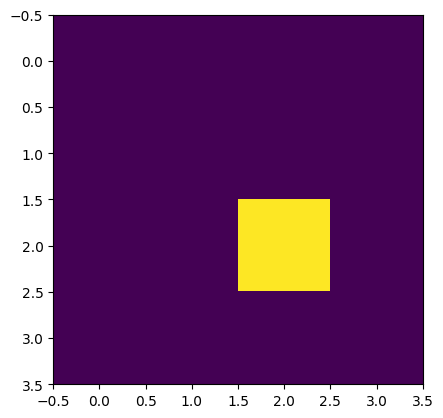

torch.Size([1, 1, 2, 2])


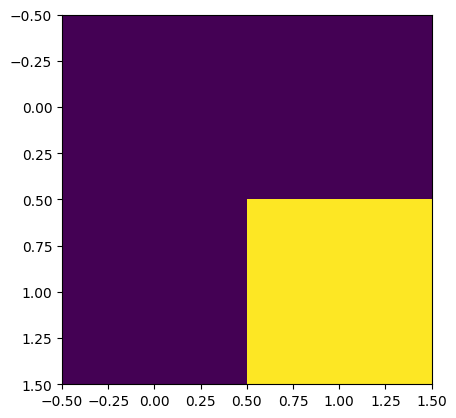

torch.Size([1, 1, 1, 1])


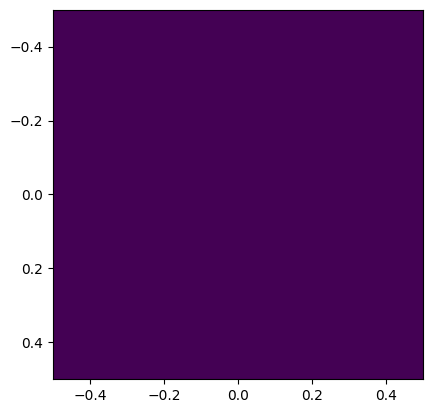

In [1]:
from kornia.filters import get_gaussian_kernel2d
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch


def show_torch(img):
    plt.figure()
    plt.imshow(img[0, 0].numpy())
    plt.show()
    plt.close()


def show_subsumpled(img, mode, times):
    for _ in range(times):
        img = F.interpolate(img, size=(img.size(-2) // 2, img.size(-1) // 2), mode=mode)
        print(img.shape)
        show_torch(img)


img = torch.zeros((1, 1, 257, 257)) # 256

kr_size = 65
sigma = 15.0
kernel = get_gaussian_kernel2d(kernel_size=(kr_size, kr_size), sigma=(sigma, sigma))

start_id = 96
img[0, 0, start_id:start_id + kr_size, start_id:start_id + kr_size] = kernel
show_torch(img)

print("6 times nearest")
show_subsumpled(img, 'nearest', times=8)


6 times bilinear
torch.Size([1, 1, 128, 128])


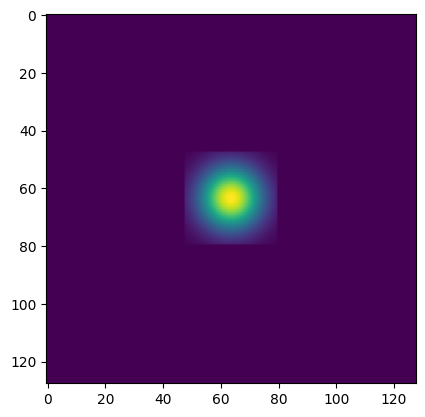

torch.Size([1, 1, 64, 64])


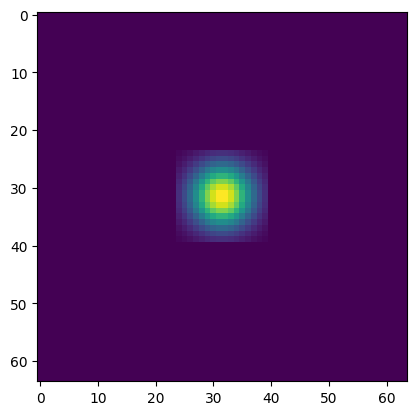

torch.Size([1, 1, 32, 32])


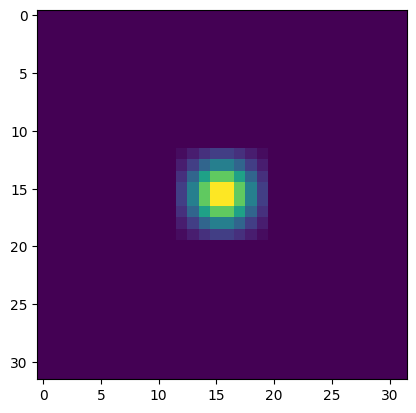

torch.Size([1, 1, 16, 16])


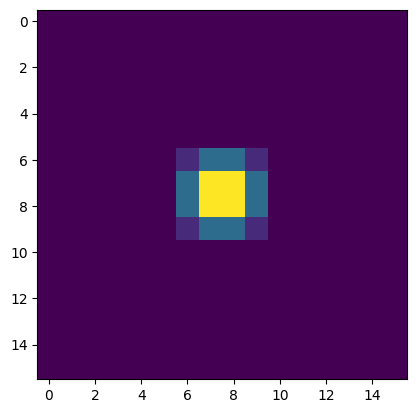

torch.Size([1, 1, 8, 8])


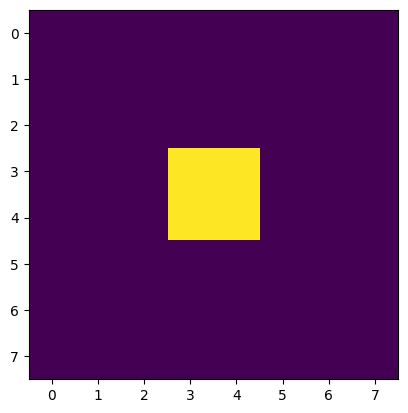

torch.Size([1, 1, 4, 4])


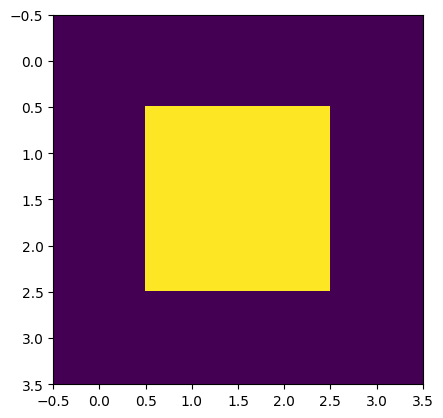

torch.Size([1, 1, 2, 2])


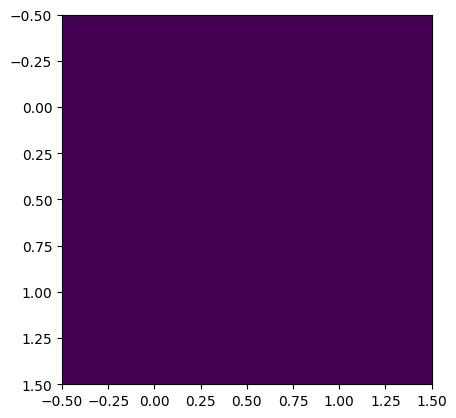

torch.Size([1, 1, 1, 1])


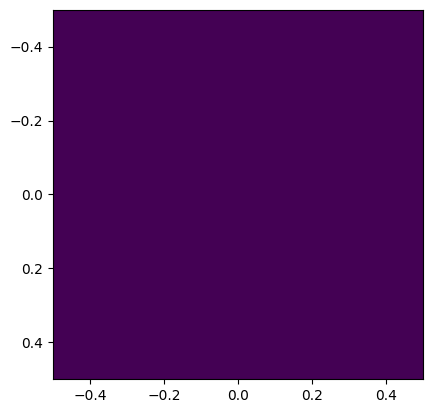

In [2]:
print("6 times bilinear")
show_subsumpled(img, 'bilinear', times=8)
